<a href="https://colab.research.google.com/github/NtimTim/DS_School_Home_Work/blob/main/Hometask/Task3_dmrf_OOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/4vel/python-intro/blob/main/Hometask/Task3_dmrf_OOP.ipynb)

# Задание

* Реализовать в ООП - формате задания 1 и 2

### Справочно:
Задание 1
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe
* Cохранить pandas dataframe в pickle
* Cохранить pandas dataframe в excel
* Cохранить pandas dataframe в БД

Задание 2
* Используя данные об объектах недвижимости на сайте “наш.дом.рф” или cian.ru, провести мини-исследование рынка строящейся/готовой недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
<b> Идеи для мини-исследования </b>
* Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
* Рассчитать объемы вводимого жилья по регионам и по годам.
* Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах.
* Визуализировать разброс, связь, доли, распределение этих показателей по регионам.
* Сделать выводы по каждому из расчетов и графиков


In [66]:
# Ваш код здесь...
import requests
! pip install git+https://github.com/lenarsaitov/cianparser.git
import cianparser
import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  Cloning https://github.com/lenarsaitov/cianparser.git to /tmp/pip-req-build-ng7xfok7
  Running command git clone --filter=blob:none --quiet https://github.com/lenarsaitov/cianparser.git /tmp/pip-req-build-ng7xfok7
  Resolved https://github.com/lenarsaitov/cianparser.git to commit 236352a200b08b27c24d14b18939b4c34691cbb2
  Preparing metadata (setup.py) ... done


In [52]:
class DataLoaderFromCian():
  def __init__(self):
    self.data = None

  def load_data(self):
    moscow_parser = cianparser.CianParser(location="Москва")
    self.data = moscow_parser.get_flats(deal_type="sale", rooms=(1, 2), with_saving_csv=False, additional_settings={"start_page":1, "end_page":20})

  def load_data_from_file(self):
    from google.colab import files
    uploaded = files.upload() #выберите файл на диске df_nashdomrf.pkl
    import pickle
    self.data = pickle.load(open('df_nashdomrf.pkl', 'rb'))

  def save_to_db(self):
    self.data.to_pickle('df_nashdomrf.pkl')

  def save_to_csv(self):
    self.data.to_csv('df_nashdomrf.csv', index=False)

  def save_to_xls(self):
    self.data.to_excel('df_nashdomrf.xlsx', index=False)

In [53]:
dl = DataLoaderFromCian()
#dl.load_data()
dl.load_data_from_file()
dl.save_to_db()
dl.save_to_csv()
dl.save_to_xls()

Saving df_nashdomrf.pkl to df_nashdomrf (3).pkl


In [73]:
class Visualiser():
  def __init__(self,data):
    self.data = data

  def make_boxplot(self):
    df_no_NaN = self.data.loc[self.data['objPriceAvg'].notnull()]
    df_region_price_series = df_no_NaN.groupby('region', as_index=True)['objPriceAvg'].mean()
    from pylab import rcParams
    rcParams['figure.figsize'] = 9,12
    df_region_price_series.sort_values(ascending=False).plot(kind='barh')
    plt.title('Диаграмма средних цен за квадратный метр по регионам без учета пропусков', size = 12, color = 'g')
    plt.xlabel('Средняя цена за квадратный метр')
    plt.ylabel('Код региона')
    plt.show()

  def make_year_histogram(self):
    self.data['year']= self.data['objReady100PercDt'].astype(str).str[0:4]
    df_year = self.data.groupby(['year'], as_index=True)['objSquareLiving'].sum()
    df_year.plot(kind='bar')
    plt.title('Гистограмма объемов вводимого жилья по годам.', size = 12, color = 'g')
    plt.xlabel('Год')
    plt.ylabel('Объем вводимого жилья')
    plt.show()

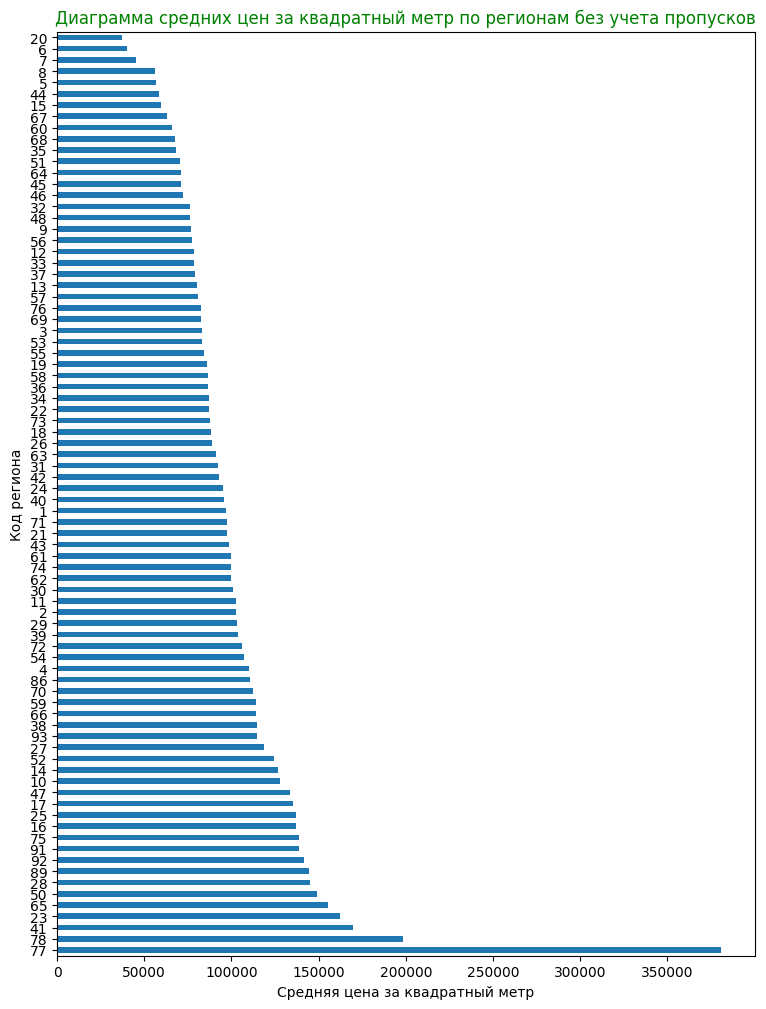

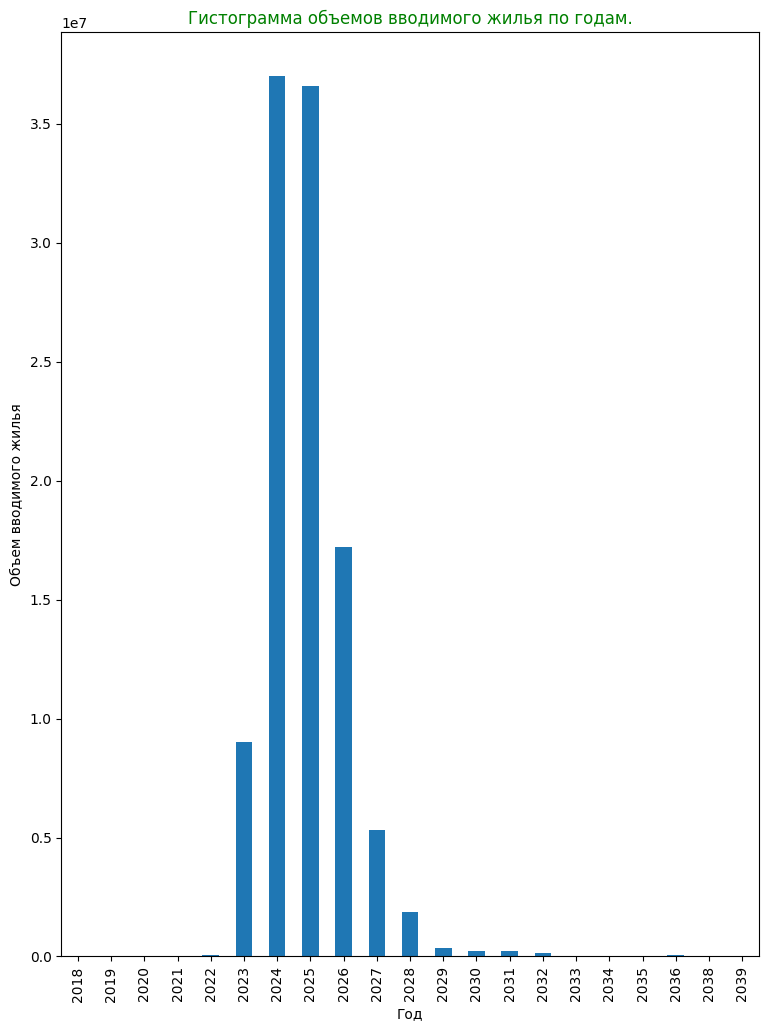

In [74]:
vl = Visualiser(dl.data)
vl.make_boxplot()
vl.make_year_histogram()
